## Arrest Data
##### By Justin Holt
#### Analyzing number of arrests in various neighborhoods to determine the "safest" neighborhood.
This analysis will create determine the "safeness" of each neighborhood.

#### Initialization
Just simple initialization of the packages I'm using to analyze the data.

In [2]:
import numpy as np # numpy library import
import pandas as pd # pandas library import
import geopandas as gpd # geopandas library import
%matplotlib inline # Display plots inline 
import matplotlib.pyplot as plt # matplotlib pyplot import

UsageError: unrecognized arguments: # Display plots inline


### Data Analysis
#### Data Initialization
Here, I load the data from WPRDC, remove any invalid values, and then create a new dataset that only contains the neighborhood and the number of arrests in that neighborhood.

In [3]:
arrest_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f") # Load data from WPRDC
arrest_data = arrest_data.dropna() # Remove invalid arrest data
arrest_data.rename(columns={
    "incidentneighborhood".upper(): "neighborhood" # Rename 'INCIDENTNEIGHBORHOOD' to 'neighborhood'
}, inplace=True)
arrests = arrest_data["neighborhood"].value_counts().rename_axis("neighborhood").to_frame("arrests") # Create new dataset with neighborhood and arrests
arrests.head(10) # List the first ten (10) neighborhoods and their number of arrests

,arrests
neighborhood,
Central Business District,2632
South Side Flats,2267
Carrick,1546
East Allegheny,1517
Homewood South,1445
Homewood North,1324
East Liberty,1070
Marshall-Shadeland,986
Mount Washington,970


#### Metric
Here, I used the dataset created in the data initialization to create my metric, which I have titled the "Safety Index". First, I normalize the arrest data and then store that in a new dataset. I call this value the "Danger Index." Then, I invert the values to get the safety index.

In [70]:
danger_index = (arrests - arrests.mean()) / (arrests.max() - arrests.min()) # Normalize data
danger_index = danger_index.rename(columns={"arrests": "danger_index"}) # Rename 'arrests' column to 'danger_index'; Create Danger Index
safety_index = abs(danger_index - 1).rename(columns={"danger_index": "safety_index"}) # Create safety index from danger index
safety_index.sort_values(by="safety_index", ascending=False).head(10) # List the first ten (10) neighborhoods and their Safety Index (in descending order)

,safety_index
neighborhood,
Mt. Oliver Neighborhood,1.157015
Outside County,1.156635
Troy Hill-Herrs Island,1.155874
Outside State,1.155494
Mt. Oliver Boro,1.155114
Regent Square,1.152452
Outside City,1.150171
Ridgemont,1.150171
East Carnegie,1.149790


#### Data Visualization
First, I load a shapefile of the neighborhoods in Pittsburgh. Then, using that map data, I create a map illustrating the Danger Index (Red) in each neighborhood. Then, using the same map data of Pittsburgh neighborhoods, I create a map illustrating the Safety Index (Green), my primary metric.

<AxesSubplot:>

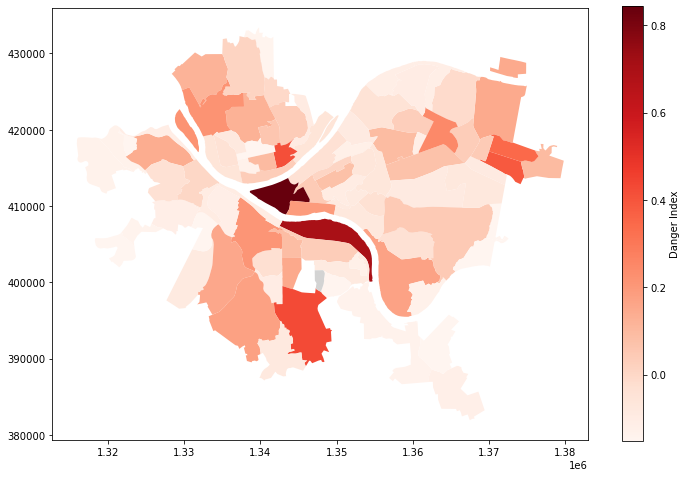

In [52]:
neighborhood_map = gpd.read_file("https://pghgishub-pittsburghpa.opendata.arcgis.com/datasets/dbd133a206cc4a3aa915cb28baa60fd4_0.zip?outSR=%7B%22latestWkid%22%3A2272%2C%22wkid%22%3A102729%7D") # Load neighborhood shapefile
danger_index_map = neighborhood_map.merge(danger_index, how="left", left_on="hood", right_on="neighborhood") # Create map of the Danger Index
danger_index_map.plot(
    column="danger_index", # Plot the Danger Index data
    cmap="Reds", # Display red colorscale
    figsize=(12, 8), # Change figure size
    legend=True, # Display legend
    missing_kwds={"color": "lightgrey"}, # Display gray for missing data
    legend_kwds={"label": "Danger Index"} # Label legend
)

<AxesSubplot:>

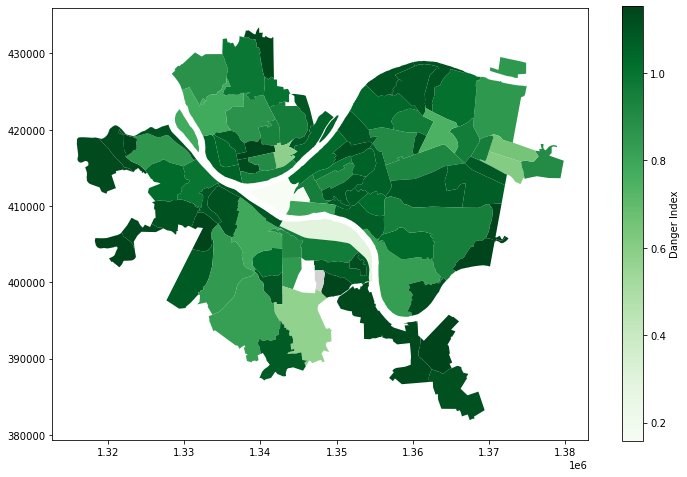

In [66]:
safety_index_map = neighborhood_map.merge(safety_index, how="left", left_on="hood", right_on="neighborhood") # Create map of the Safety Index
safety_index_map.plot(
    column="safety_index", # Plot the Safety Index data
    cmap="Greens", # Display green colorscale
    figsize=(12, 8), # Change figure size
    legend=True, # Display legend
    missing_kwds={"color": "lightgrey"}, # Display gray for missing data
    legend_kwds={"label": "Danger Index"} # Label legend
)

#### Conclusion
Based on the arrest data in each neighborhood, I have determined the "safest" neighborhoods in Pittsburgh:

In [75]:
safety_index.sort_values(by="safety_index", ascending=False).head(10) # List top ten (10) Safety Index neighborhoods

,safety_index
neighborhood,
Mt. Oliver Neighborhood,1.157015
Outside County,1.156635
Troy Hill-Herrs Island,1.155874
Outside State,1.155494
Mt. Oliver Boro,1.155114
Regent Square,1.152452
Outside City,1.150171
Ridgemont,1.150171
East Carnegie,1.149790
